### **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
path = 'iris.data'

### **Reading the IRIS data**

In [ ]:
def read_IRIS_Data(path):
  df = pd.read_csv(path,names = ['SepalLength(cm)','SepalWidth(cm)','PetalLength(cm)','PetalWidth(cm)','Class'])
  df.drop('Class',axis = 1,inplace=True)
  return df

read_IRIS_Data(path)

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### **K Means Clustering Algorithm**

In [ ]:
#Initiallizing the parameters
df_org = read_IRIS_Data(path)
prev_var = 100
var = 0
k = 1
prev_cluster = {}



print('No of Clusters\tNo to iterations\tVariance')
#To determine the number of clusters.
while True:
  df_samples = np.array(df_org.sample(n = k))
  df = np.array(df_org)
  centroid = {}
  prev_centroids = {}

  #Applying the K Means Clustering Algorithm
  
  #Initializing the means
  for i in range(k):
    centroid[i+1] = df_samples[i]
  
  cluster = {}
  cnt = 0
  
  #Iterating over the dataset
  while True:
    cnt += 1
    
    #Assigning the point to the cluster
    for ex in df:
      dist = []
      for i in range(k):
        dist_calc = np.linalg.norm(ex - centroid[i+1])
        dist.append((dist_calc,i+1))
      
      if min(dist)[1] not in cluster :
        cluster[min(dist)[1]] = ex
      else:
        cluster[min(dist)[1]] = np.vstack((cluster[min(dist)[1]],ex))
    
    #Calculating the mean of each cluster and updating the centroids.
    for i in range(k):  
      centroid[i+1] = np.mean(cluster[i+1],axis = 0).tolist()
    
    var_calc = []
    #Calculating the Variance.
    for i in range(k):
      var_calc.append(np.sum(np.var(cluster[i+1],axis = 0)))
    var = np.sum(var_calc)
    
    #Comparing the centroids with previous centroids
    if centroid == prev_centroids:
      break
    else:
      prev_centroids = deepcopy(centroid)
      cluster.clear()
  print('{0: 5d}\t\t{1: 5d}\t\t\t{2: 3.4f}'.format(k,cnt,var))

  if prev_var < var:
    break
  else:
    prev_var = var
    prev_cluster = deepcopy(cluster)
    k += 1


No of Clusters	No to iterations	Variance
    3		    5			 1.5755
    4		   16			 1.6162


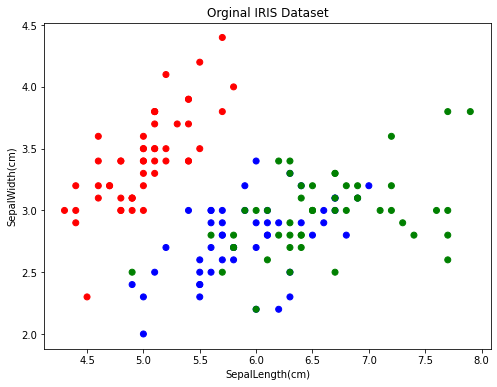

In [ ]:

df_plot = pd.read_csv('iris.data',names = ['SepalLength(cm)','SepalWidth(cm)','PetalLength(cm)','PetalWidth(cm)','Class'])
class_map = {'Iris-setosa' : 'red','Iris-versicolor' : 'blue','Iris-virginica' : 'green'}
df_plot.replace({'Class': class_map},inplace = True)
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(df_plot['SepalLength(cm)'],df_plot['SepalWidth(cm)'],color = df_plot['Class'])
plt.xlabel('SepalLength(cm)')
plt.ylabel('SepalWidth(cm)')
plt.title('Orginal IRIS Dataset')
plt.show()

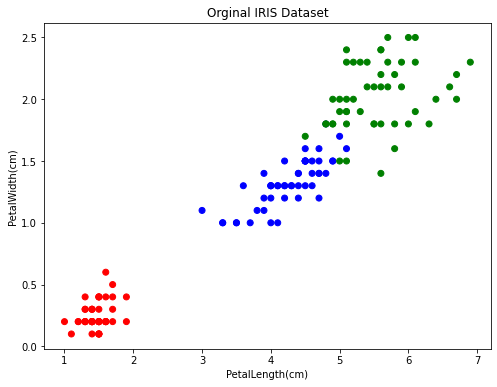

In [ ]:

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(df_plot['PetalLength(cm)'],df_plot['PetalWidth(cm)'],color = df_plot['Class'])
plt.xlabel('PetalLength(cm)')
plt.ylabel('PetalWidth(cm)')
plt.title('Orginal IRIS Dataset')
plt.show()

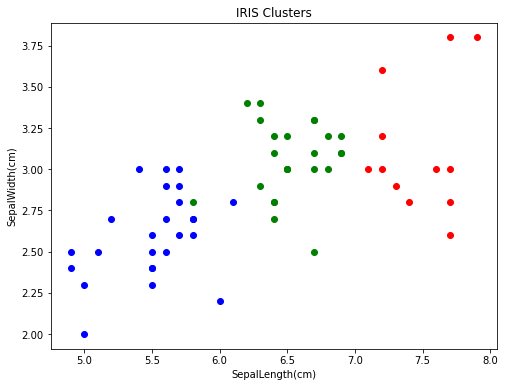

In [ ]:

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(prev_cluster[1][:,0],prev_cluster[1][:,1],color = 'red')
plt.scatter(prev_cluster[2][:,0],prev_cluster[2][:,1],color = 'blue')
plt.scatter(prev_cluster[3][:,0],prev_cluster[3][:,1],color = 'green')
plt.xlabel('SepalLength(cm)')
plt.ylabel('SepalWidth(cm)')
plt.title('IRIS Clusters')
plt.show()

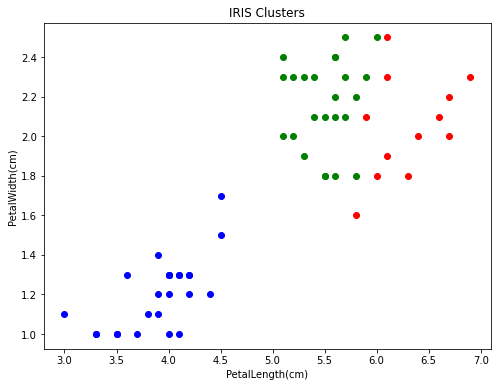

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(prev_cluster[1][:,2],prev_cluster[1][:,3],color = 'red')
plt.scatter(prev_cluster[2][:,2],prev_cluster[2][:,3],color = 'blue')
plt.scatter(prev_cluster[3][:,2],prev_cluster[3][:,3],color = 'green')
plt.xlabel('PetalLength(cm)')
plt.ylabel('PetalWidth(cm)')
plt.title('IRIS Clusters')
plt.show()